## NJSLA Spring 25 ELA Testing Time Multiple Linear Regression

Analysis of the ELA results of the Spring 25 NJSLA

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime as dt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [2]:
# importing dataset
df_ela = pd.read_excel(r"S:\ASSESSMENTS\NJSLA 2025\NJSLA 2025 ELA Math Summative Record File.xlsx", parse_dates = ['Unit1OnlineTestEndDateTime','Unit1OnlineTestStartDateTime',
                                                                                                                   'Unit2OnlineTestStartDateTime','Unit2OnlineTestEndDateTime',
                                                                                                                  'Unit3OnlineTestStartDateTime','Unit3OnlineTestEndDateTime'])
df_ela = df_ela[df_ela['TestStatus']=='Attempt']

In [3]:
# function for proficiency
def proficient (row):
    if row['TestScaleScore'] >= 750:
        return 1
    elif row['TestScaleScore'] < 750:
        return 0

df_ela['proficient'] = df_ela.apply(proficient, axis = 1)

In [4]:
# Tesing Time

# unit 1
df_ela['Unit 1 Testing Time'] = df_ela['Unit1OnlineTestEndDateTime'] - df_ela['Unit1OnlineTestStartDateTime']
df_ela['Unit 1 Testing Time'] = df_ela['Unit 1 Testing Time'].dt.total_seconds()/60

# unit 2
df_ela['Unit 2 Testing Time'] = df_ela['Unit2OnlineTestEndDateTime'] - df_ela['Unit2OnlineTestStartDateTime']
df_ela['Unit 2 Testing Time'] = df_ela['Unit 2 Testing Time'].dt.total_seconds()/60

# total testing time for ELA03
df_ela['Total_Test_Time'] = df_ela['Unit 1 Testing Time'] + df_ela['Unit 2 Testing Time']

In [5]:
subject = 'ELA'

In [6]:
# filtering to return ELA TestCodes
df_ela_6_9 = df_ela[df_ela['TestCode'].isin(['ELA06', 'ELA07','ELA08', 'ELA09'])]#--> filtering for middle school grades

In [7]:
q3 = df_ela_6_9['Total_Test_Time'].quantile(.75) #--> 75th percentile
q1 = df_ela_6_9['Total_Test_Time'].quantile(.25) #--> 25th percentile
iqr = q3-q1 # IQR

# finding outliers
outlier_upper = q3 + (1.5 * iqr) 
outlier_lower = q1 - (1.5 * iqr)

print(f"An outlier in the for the NJSLA {subject} is a Total Test Time greater than or equal to {round(outlier_upper,2)} minutes",
      f",or a Total Test Time less than or equal to {round(outlier_lower,2)} minutes.",
      f"There are {df_ela_6_9[(df_ela_6_9['Total_Test_Time']<=outlier_lower)|(df_ela_6_9['Total_Test_Time']>=outlier_upper)].shape[0]} outliers in the dataset.")

An outlier in the for the NJSLA ELA is a Total Test Time greater than or equal to 235.52 minutes ,or a Total Test Time less than or equal to 3.52 minutes. There are 6 outliers in the dataset.


In [8]:
# displaying outliers
df_ela_6_9[(df_ela_6_9['Total_Test_Time']<=outlier_lower)|(df_ela_6_9['Total_Test_Time']>=outlier_upper)][['FirstName','LastOrSurname','TestingSchoolCode','GradeLevelWhenAssessed','StudentWithDisabilities','Total_Test_Time']]

,FirstName,LastOrSurname,TestingSchoolCode,GradeLevelWhenAssessed,StudentWithDisabilities,Total_Test_Time
1185,EMILIE,SPENCER,60,6,IEP,333.933333
1338,LINCOLN,CHOI,60,8,N,4134.533333
1667,ANNABELLA,IANNACONE,60,7,504,251.466667
2354,SAHO,YUUCHI,70,7,N,275.100000
2613,JEREMIAH,CUNNINGHAM,70,8,B,10163.883333
3277,ALEXANDER,WANG,70,6,IEP,279.516667


|Testing school Code|School Name
|---|---|
|060|Benjamin Franklin Middle School|
|070|George Washington Middle School|

In [9]:
# removing outliers
df_ela_6_9 = df_ela_6_9[(df_ela_6_9['Total_Test_Time']>outlier_lower)&(df_ela_6_9['Total_Test_Time'] < outlier_upper)]

In [10]:
df_ela_6_9['Total_Test_Time'].describe()

count    1655.000000
mean      119.518499
std        39.295919
min        16.750000
25%        90.516667
50%       113.533333
75%       147.866667
max       227.166667
Name: Total_Test_Time, dtype: float64

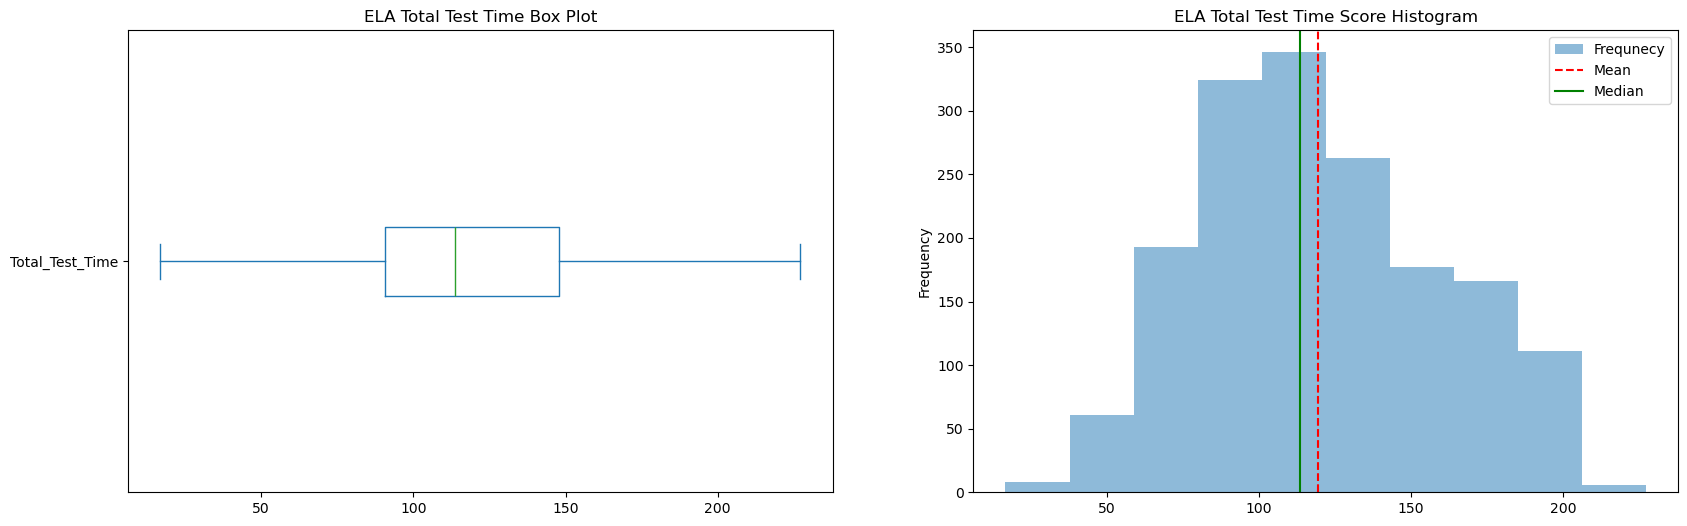

In [11]:
# statistical metrics
mean = round(df_ela_6_9['Total_Test_Time'].mean(),2)
median = round(df_ela_6_9['Total_Test_Time'].median(),2)

# plotting Test Scale Score Distribution
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

df_ela_6_9['Total_Test_Time'].plot(kind = 'box', vert = False, title = f'{subject} Total Test Time Box Plot', ax = ax[0])
df_ela_6_9['Total_Test_Time'].plot(kind = 'hist', title = f'{subject} Total Test Time Score Histogram', ax = ax[1], alpha = .5)

ax[1].axvline(x = mean, linestyle = '--', color = 'red')
ax[1].axvline(x = median, linestyle= '-', color = 'green')

plt.legend(['Frequnecy','Mean','Median'])

plt.show()

In [12]:
print(f"The typical test time for the NJSLA {subject} is {round(median,2)} minutes",
     f"\nThe typical testing time for students who were proficient in {subject} on the NJSLA is {round(df_ela_6_9[df_ela_6_9['proficient']==1]['Total_Test_Time'].median(),2)} minutes.",
     f"\nThe typical testing_time_for students who were not proficient in {subject} on the NJSLA is {round(df_ela_6_9[df_ela_6_9['proficient']==0]['Total_Test_Time'].median(),2)} minutes.",
     f"\nThat is a difference of {round(df_ela_6_9[df_ela_6_9['proficient']==1]['Total_Test_Time'].median()-df_ela_6_9[df_ela_6_9['proficient']==0]['Total_Test_Time'].median(),2)} additional minutes spent testing for students who were proficient in {subject} on the NJSLA ")

The typical test time for the NJSLA ELA is 113.53 minutes 
The typical testing time for students who were proficient in ELA on the NJSLA is 121.73 minutes. 
The typical testing_time_for students who were not proficient in ELA on the NJSLA is 79.36 minutes. 
That is a difference of 42.38 additional minutes spent testing for students who were proficient in ELA on the NJSLA 


In [13]:
# creating function to return binary IEP column
def iep(row):
    if row['StudentWithDisabilities'] == 'IEP':
        return 1 #--> yes
    else:
        return 0 #--> no

df_ela_6_9['IEP'] = df_ela_6_9.apply(iep,axis =1)

In [14]:
# creating function to return binary EconomicDisadvantgeStatus column
def eds(row):
    if row['EconomicDisadvantageStatus'] == 'Y':
        return 1 #--> yes
    else:
        return 0 #--> no

df_ela_6_9['EDS'] = df_ela_6_9.apply(eds,axis =1)

In [15]:
df_ela_6_9['IEP'].unique()

array([0, 1], dtype=int64)

In [16]:
df_ela_6_9['EDS'].unique()

array([0, 1], dtype=int64)

In [17]:
# Calculating the Variance Inflation Factor (VIF)
x = df_ela_6_9[['Total_Test_Time','IEP','EDS']]#--> assigning x values
vif = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])] #--> converts x into numpy array and finds the VIF for the i-th indicies
vif = zip(x,vif) #--> combining output, independent variable and VIF output
print(list(vif))

[('Total_Test_Time', 1.0767447980731053), ('IEP', 1.0872478204202316), ('EDS', 1.0342407146029555)]


#### VIF Notes
A Variance Inflation Factor (VIF) quantifies multicollinearity, where a **VIF of 1 indicates no multicollinearity**, while values above **5 or 10 suggest high multicollinearity** that can inflate standard errors and reduce the reliability of regression coefficients. You interpret VIFs as follows: **VIF = 1 means the predictor is not correlated with others**. **1 < VIF < 5 indicates moderate correlation**, which may be acceptable. **5 ≤ VIF < 10 signals high, potentially problematic correlation**. **VIF ≥ 10 means very high, problematic multicollinearity requiring attention.**

In [18]:
#segmenting data for the multiple linear regression
data_x = df_ela_6_9[['Total_Test_Time','IEP','EDS']]
data_y = df_ela_6_9['TestScaleScore']

In [19]:
#splitting data
X_train,X_test,y_train,y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state = 42)

In [20]:
# creating model
ols_formula = 'TestScaleScore ~ Total_Test_Time + C(IEP)+C(EDS)'
ols_data = pd.concat([X_train,y_train],axis = 1)

OLS = ols(formula = ols_formula, data = ols_data)

model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TestScaleScore   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     285.4
Date:                Thu, 11 Dec 2025   Prob (F-statistic):          1.71e-138
Time:                        07:21:20   Log-Likelihood:                -5461.1
No. Observations:                1156   AIC:                         1.093e+04
Df Residuals:                    1152   BIC:                         1.095e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         730.9566      2.690    271.717      0.000     725.678     736.235
C(IEP)[T.1]       -43.2337      2.739    -15.783      0.000     -48.608     -37.859
C(EDS)[T.1]       -26.3691      5.276     -4.998      0.000     -36.720     -16.018
Total_Test_Time     0.4273      0.021     20.523      0.000       0.386       0.468
==============================================================================
Omnibus:                       33.522   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.583
Skew:                          -0.327   Prob(JB):                     5.66e-10
Kurtosis:                       3.676   Cond. No.                         834.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS Model Summary

- There is a r-squared value of .426, meaning that 43% of the variation in the dependent variable is explained by the independent variable, which is relatively high in education as there are a plethora of variables that affect testing outcomes.

- The P-value is 0, means that the coefficient is statistically significant and variation did not occur by chance as the null hypothesis suggests.

- Based on the model and encoding the **General Education students are coded as 0**, students with IEPs that complete the ELA section on the NJSLA in the same amount of time as general education students will have a test scale score that is approximately 43 points less than a general education student's score.

- Based on the model and encoding the **Students that aren't economically disadvantaged are coded as 0**, students that are economically disadvantaged that complete the ELA section on the NJSLA in the same amount of time as students that aren't economically disadvantaged students will have a test scale score that is approximately 26 points less than a student that is economically disadvantaged.

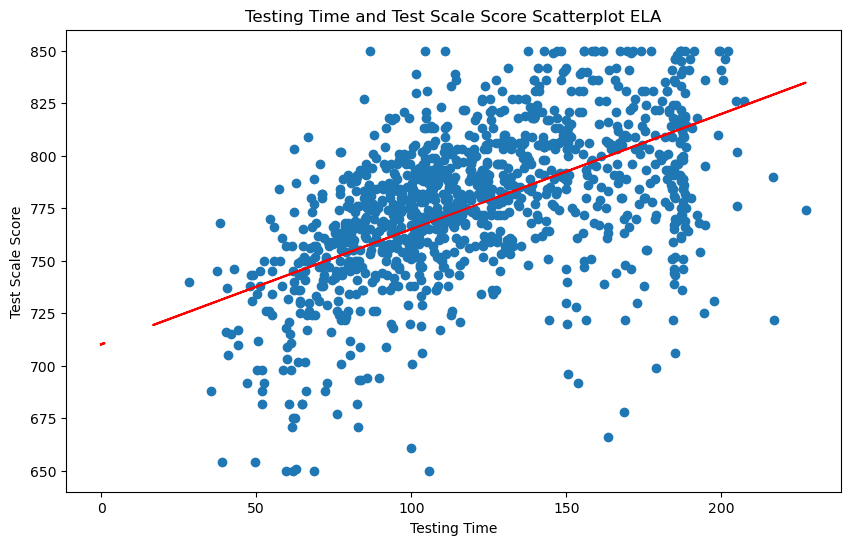

In [21]:
# creating x and y values for line of best fit for the scatter plot
x_fit = ols_data['Total_Test_Time'].fillna(0) #--> x-values & filling in NA values with 0
y_fit = ols_data['TestScaleScore'].fillna(0)#--> y-values & filling in NA values with 0
deg = 1 #--> degree

# creating polyfit variable
z = np.polyfit(x_fit,y_fit, deg) #--> passing in x-values and y-values with a degree of 1, the best possible fit
p = np.poly1d(z)#--> creating a 1-D polynomial object

# plotting data
fig = plt.figure(figsize = (10,6))
plt.scatter(x = 'Total_Test_Time', y = 'TestScaleScore', data = ols_data)
plt.plot(x, p(x), color = 'red') #--> plotting line of best fit, p(x)
plt.xlabel('Testing Time')
plt.ylabel('Test Scale Score')
plt.title(f'Testing Time and Test Scale Score Scatterplot {subject}')
plt.show()

### Model Assumption: Linearity

In [22]:
print(f"There is a linear relationship between Testing Time and Test Scale Score, the correlation coefficient for the two variables is {df_ela_6_9['TestScaleScore'].corr(df_ela_6_9['Total_Test_Time']):.2}")

There is a linear relationship between Testing Time and Test Scale Score, the correlation coefficient for the two variables is 0.54


### Model Assumption: No Multicollinearity Assumption

In [23]:
# Calculating the Variance Inflation Factor (VIF)
x = df_ela_6_9[['Total_Test_Time','IEP','EDS']]#--> assigning x values
vif = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])] #--> converts x into numpy array and finds the VIF for the i-th indicies
vif = zip(x,vif) #--> combining output, independent variable and VIF output
print(list(vif))

[('Total_Test_Time', 1.0767447980731053), ('IEP', 1.0872478204202316), ('EDS', 1.0342407146029555)]


### Model Assumption: Normality
Errors are normally distributed

#### Plots to check assumption
1. Histogram of residuals
2. Q-Q plot of residuals

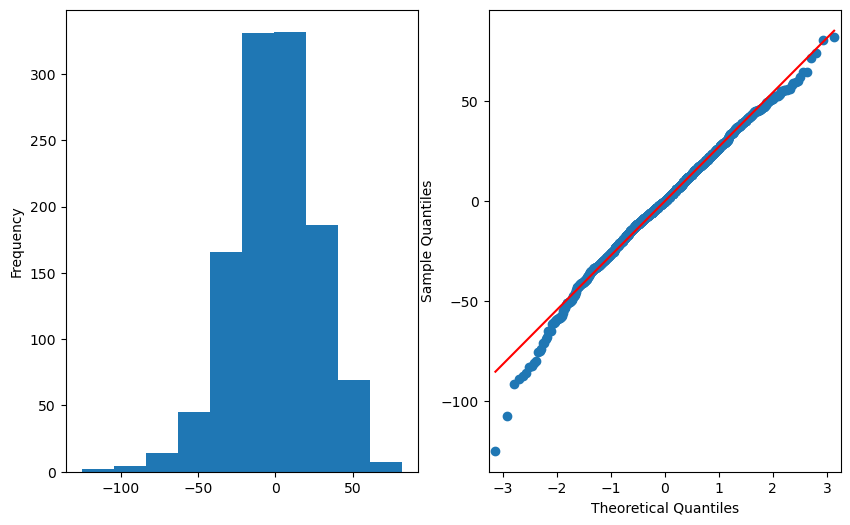

In [24]:
# creating residuals
residuals = model.resid

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,6))

residuals.plot(kind = 'hist',ax = ax[0])
sm.qqplot(residuals, line = 's', ax = ax[1])



plt.show()

There is a slight left skew in the residuals are normally distributed

### Model Assumption: Homoscedasticity

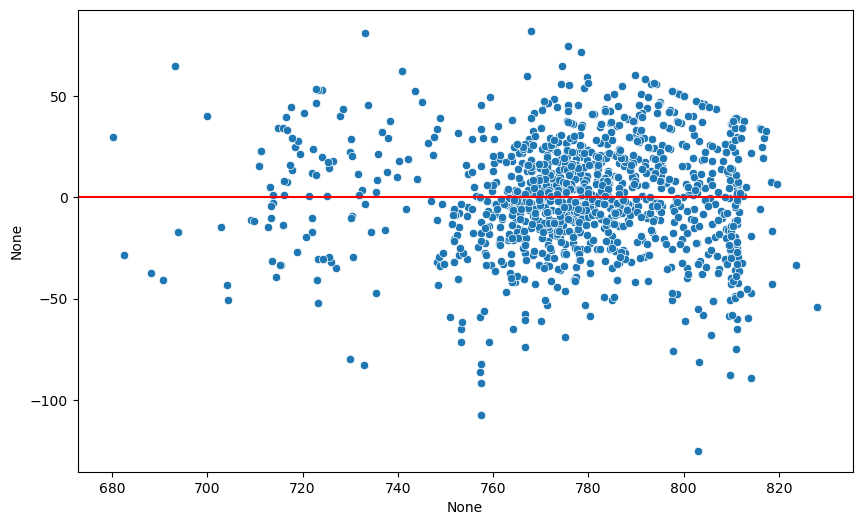

In [25]:
# creating scatterplot to test homoscedasticity
fig = plt.figure(figsize = (10,6))
sns.scatterplot( x = model.fittedvalues, y = model.resid)#--> plotting fitted values and residuals
plt.axhline(0, color = 'red')#--> plotting reference line
plt.show()

#### Model Evaluation
The model meets all four assumptions of a simple linear regression model:

- Linearity
- No Mulitcollinearity
- Independent Observations
- Normality
- Homoscedasticity

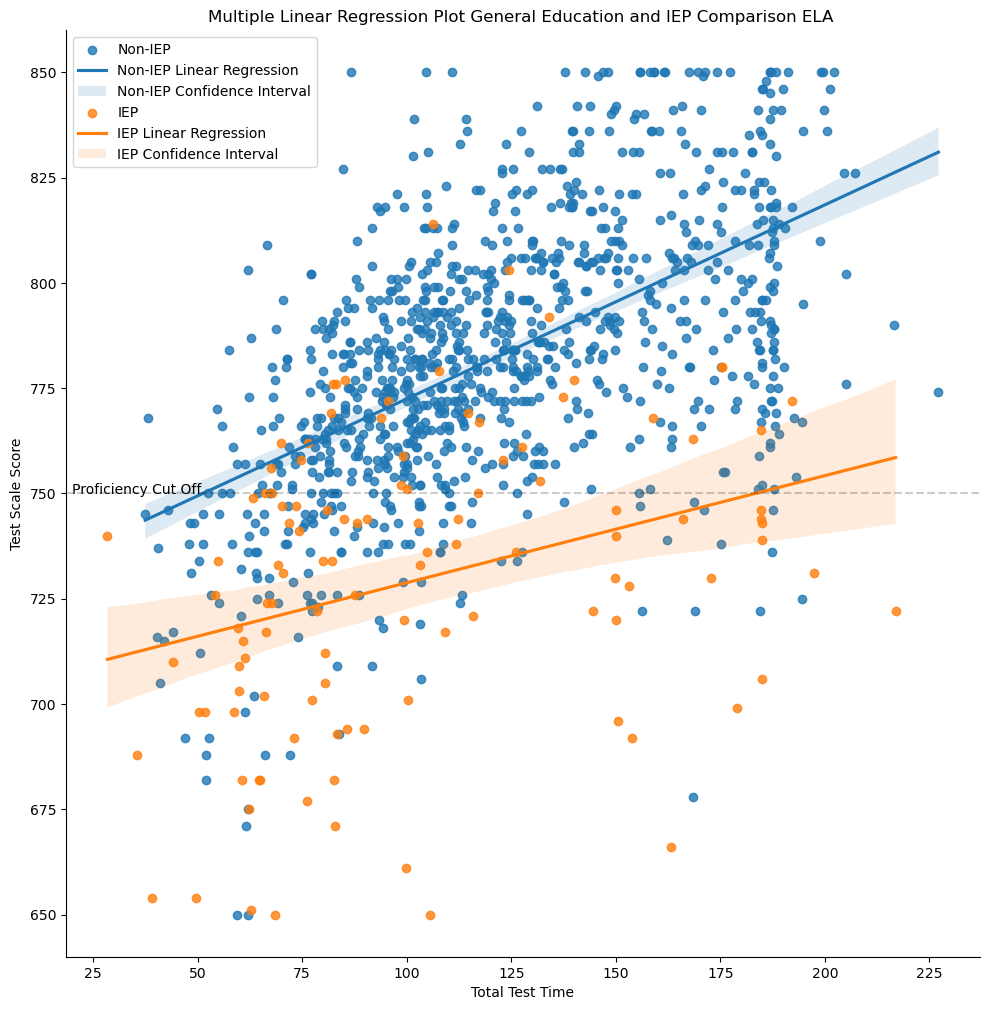

In [26]:
# creating a linear model plot
viz = sns.lmplot(data = ols_data, x = 'Total_Test_Time',y = 'TestScaleScore', legend = False,hue = 'IEP' ,height = 10)

plt.legend(['Non-IEP','Non-IEP Linear Regression','Non-IEP Confidence Interval',
           'IEP','IEP Linear Regression','IEP Confidence Interval'], loc = 'upper left')
plt.title(f'Multiple Linear Regression Plot General Education and IEP Comparison {subject} ')#--> creating title
plt.xlabel('Total Test Time')
plt.ylabel('Test Scale Score')
plt.axhline( y = 750, color = 'black', linestyle = '--',alpha = .2) #--> horizontal line
plt.text(x = 20, y = 750 , s = 'Proficiency Cut Off') #--> text
plt.show()

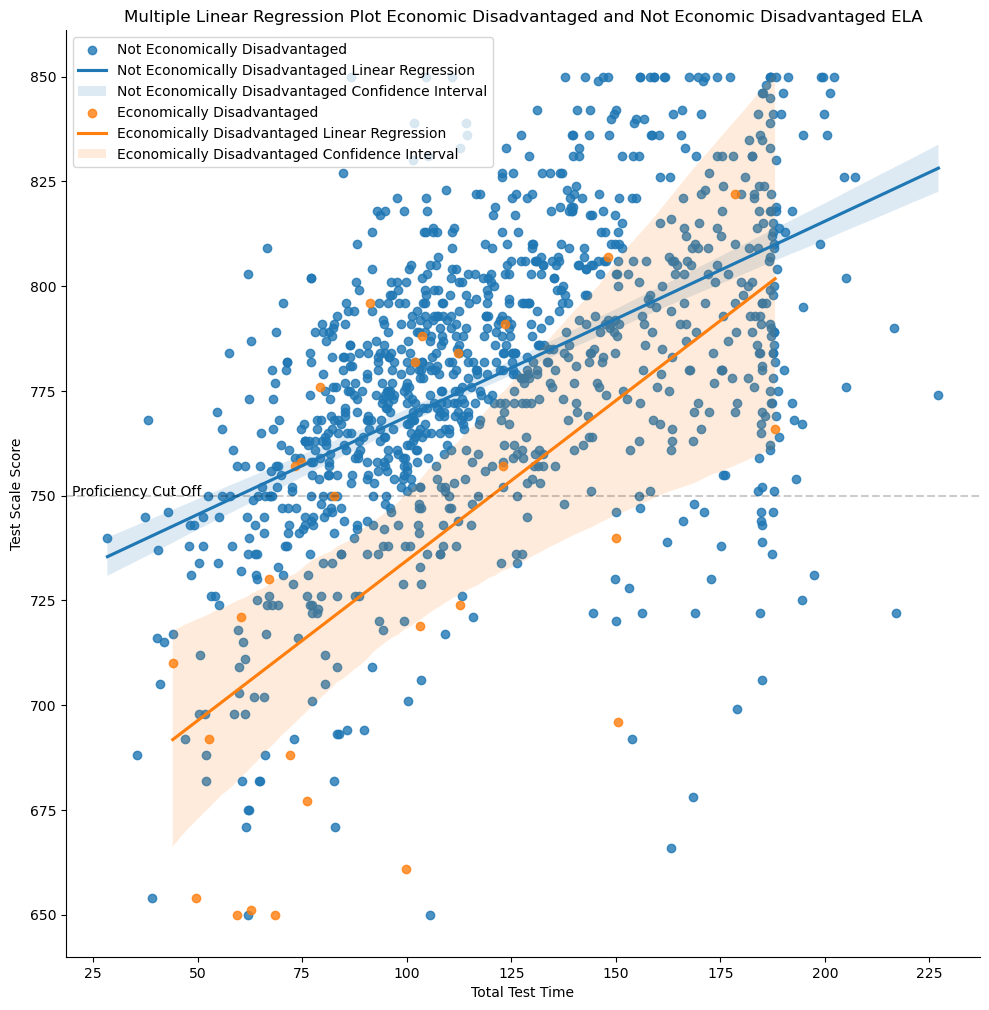

In [27]:
# creating a linear model plot
viz = sns.lmplot(data = ols_data, x = 'Total_Test_Time',y = 'TestScaleScore', legend = False,hue = 'EDS' ,height = 10)

plt.legend(['Not Economically Disadvantaged','Not Economically Disadvantaged Linear Regression','Not Economically Disadvantaged Confidence Interval',
           'Economically Disadvantaged','Economically Disadvantaged Linear Regression','Economically Disadvantaged Confidence Interval',], loc = 'upper left')
plt.title(f'Multiple Linear Regression Plot Economic Disadvantaged and Not Economic Disadvantaged {subject}')#--> creating title
plt.xlabel('Total Test Time')
plt.ylabel('Test Scale Score')
plt.axhline( y = 750, color = 'black', linestyle = '--',alpha = .2)
plt.text(x = 20, y = 750 , s = 'Proficiency Cut Off') #--> text
plt.show()